In [1]:
import pandas as pd
from datetime import datetime
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
import matplotlib.pyplot as plt 
import pandas as pd
import pickle

In [2]:
xls = pd.ExcelFile('Annotation_Sheet(P108&P102&P113 - Edit).xlsx')

dfs = []
for sheet_name in xls.sheet_names:
    df = pd.read_excel('Annotation_Sheet(P108&P102&P113 - Edit).xlsx', sheetname=sheet_name)
    dfs.append(df)
    
annotation = pd.concat(dfs, join='inner')

In [3]:
#Adding the Start time and end time of the clips as new names with date

annotation = annotation[annotation["Date"].notnull()]
annotation = annotation[annotation["StartClock"].notnull()]
annotation = annotation[annotation["EndClock"].notnull()]

annotation['DateStartTimeClock'] = pd.to_datetime(annotation['Date'].apply(str)+' '+annotation['StartClock'].apply(str))
annotation['DateEndTimeClock'] = pd.to_datetime(annotation['Date'].apply(str)+' '+annotation['EndClock'].apply(str))
print(annotation.shape)
annotation.head()
print(annotation.dtypes)

(4294, 17)
ParticipantID                         float64
Accel_Waist                            object
Accel_Wrist                            object
Date                           datetime64[ns]
Sequence                              float64
VideoName                              object
VideoStartClock_camera                 object
VideoStartClock_timeanddate            object
StartRunTime                           object
EndRunTime                             object
StartClock                             object
EndClock                               object
ActivityLevel1                        float64
ActivityLevel2                        float64
ActivityLevel3                        float64
DateStartTimeClock             datetime64[ns]
DateEndTimeClock               datetime64[ns]
dtype: object


In [4]:
annotation[annotation["ActivityLevel1"]==999].count()

ParticipantID                  25
Accel_Waist                    25
Accel_Wrist                    25
Date                           25
Sequence                       25
VideoName                      12
VideoStartClock_camera         12
VideoStartClock_timeanddate    12
StartRunTime                   25
EndRunTime                     25
StartClock                     25
EndClock                       25
ActivityLevel1                 25
ActivityLevel2                 25
ActivityLevel3                 25
DateStartTimeClock             25
DateEndTimeClock               25
dtype: int64

In [5]:
annotation[annotation["ActivityLevel2"]==999].count()

ParticipantID                  25
Accel_Waist                    25
Accel_Wrist                    25
Date                           25
Sequence                       25
VideoName                      12
VideoStartClock_camera         12
VideoStartClock_timeanddate    12
StartRunTime                   25
EndRunTime                     25
StartClock                     25
EndClock                       25
ActivityLevel1                 25
ActivityLevel2                 25
ActivityLevel3                 25
DateStartTimeClock             25
DateEndTimeClock               25
dtype: int64

In [6]:
annotation[annotation["ActivityLevel3"]==999].count()

ParticipantID                  25
Accel_Waist                    25
Accel_Wrist                    25
Date                           25
Sequence                       25
VideoName                      12
VideoStartClock_camera         12
VideoStartClock_timeanddate    12
StartRunTime                   25
EndRunTime                     25
StartClock                     25
EndClock                       25
ActivityLevel1                 25
ActivityLevel2                 25
ActivityLevel3                 25
DateStartTimeClock             25
DateEndTimeClock               25
dtype: int64

In [7]:
annotation = annotation[annotation["ActivityLevel1"]!=999]

In [8]:
annotation.shape

(4269, 17)

In [9]:
annotation[annotation["ActivityLevel1"]==999].count()

ParticipantID                  0
Accel_Waist                    0
Accel_Wrist                    0
Date                           0
Sequence                       0
VideoName                      0
VideoStartClock_camera         0
VideoStartClock_timeanddate    0
StartRunTime                   0
EndRunTime                     0
StartClock                     0
EndClock                       0
ActivityLevel1                 0
ActivityLevel2                 0
ActivityLevel3                 0
DateStartTimeClock             0
DateEndTimeClock               0
dtype: int64

In [10]:
annotation[annotation["ActivityLevel1"].isnull()].count()

ParticipantID                  3
Accel_Waist                    3
Accel_Wrist                    3
Date                           3
Sequence                       3
VideoName                      3
VideoStartClock_camera         3
VideoStartClock_timeanddate    3
StartRunTime                   3
EndRunTime                     3
StartClock                     3
EndClock                       3
ActivityLevel1                 0
ActivityLevel2                 0
ActivityLevel3                 0
DateStartTimeClock             3
DateEndTimeClock               3
dtype: int64

In [11]:
annotation[annotation["ActivityLevel2"].isnull()].count()

ParticipantID                  3
Accel_Waist                    3
Accel_Wrist                    3
Date                           3
Sequence                       3
VideoName                      3
VideoStartClock_camera         3
VideoStartClock_timeanddate    3
StartRunTime                   3
EndRunTime                     3
StartClock                     3
EndClock                       3
ActivityLevel1                 0
ActivityLevel2                 0
ActivityLevel3                 0
DateStartTimeClock             3
DateEndTimeClock               3
dtype: int64

In [12]:
annotation[annotation["ActivityLevel3"].isnull()].count()

ParticipantID                  102
Accel_Waist                    102
Accel_Wrist                    102
Date                           102
Sequence                       102
VideoName                      102
VideoStartClock_camera         102
VideoStartClock_timeanddate    102
StartRunTime                   102
EndRunTime                     102
StartClock                     102
EndClock                       102
ActivityLevel1                  99
ActivityLevel2                  99
ActivityLevel3                   0
DateStartTimeClock             102
DateEndTimeClock               102
dtype: int64

In [13]:
annotation = annotation[annotation["ActivityLevel1"].notnull()]
annotation = annotation[annotation["ActivityLevel2"].notnull()]
annotation = annotation[annotation["ActivityLevel3"].notnull()]

In [14]:
annotation.shape

(4167, 17)

In [15]:
annotation[annotation["ActivityLevel1"].isnull()].count()

ParticipantID                  0
Accel_Waist                    0
Accel_Wrist                    0
Date                           0
Sequence                       0
VideoName                      0
VideoStartClock_camera         0
VideoStartClock_timeanddate    0
StartRunTime                   0
EndRunTime                     0
StartClock                     0
EndClock                       0
ActivityLevel1                 0
ActivityLevel2                 0
ActivityLevel3                 0
DateStartTimeClock             0
DateEndTimeClock               0
dtype: int64

In [16]:
annotation[annotation["ActivityLevel3"].isnull()].count()

ParticipantID                  0
Accel_Waist                    0
Accel_Wrist                    0
Date                           0
Sequence                       0
VideoName                      0
VideoStartClock_camera         0
VideoStartClock_timeanddate    0
StartRunTime                   0
EndRunTime                     0
StartClock                     0
EndClock                       0
ActivityLevel1                 0
ActivityLevel2                 0
ActivityLevel3                 0
DateStartTimeClock             0
DateEndTimeClock               0
dtype: int64

In [17]:
annotation[annotation["ActivityLevel2"].isnull()].count()

ParticipantID                  0
Accel_Waist                    0
Accel_Wrist                    0
Date                           0
Sequence                       0
VideoName                      0
VideoStartClock_camera         0
VideoStartClock_timeanddate    0
StartRunTime                   0
EndRunTime                     0
StartClock                     0
EndClock                       0
ActivityLevel1                 0
ActivityLevel2                 0
ActivityLevel3                 0
DateStartTimeClock             0
DateEndTimeClock               0
dtype: int64

In [18]:
annotation.ActivityLevel1.unique()

array([ 1.,  2.,  3.])

In [19]:
annotation.ActivityLevel2.unique()

array([ 10.,  20.,  30.,   2.])

In [20]:
annotation.ActivityLevel3.unique()

array([ 102.,  201.,  202.,  206.,  301.,  205.,  203.,  303.,  104.,
        302.,  101.,  204.,  306.,  305.,  103.,  304.,  307.,  105.,
        106.,  107.,  207.])

In [21]:
annotation.loc[annotation.ActivityLevel1 == 3, 'ActivityLevel1'] = 2

In [22]:
annotation.ActivityLevel1.unique()

array([ 1.,  2.])

In [23]:
annotation.loc[annotation.ActivityLevel2 == 2, 'ActivityLevel2'] = 20

In [24]:
annotation.ActivityLevel2.unique()

array([ 10.,  20.,  30.])

In [25]:
annotation.loc[annotation.ActivityLevel3 == 207, 'ActivityLevel3'] = 307

In [26]:
annotation.ActivityLevel3.unique()

array([ 102.,  201.,  202.,  206.,  301.,  205.,  203.,  303.,  104.,
        302.,  101.,  204.,  306.,  305.,  103.,  304.,  307.,  105.,
        106.,  107.])

In [27]:
testdf = annotation.loc[annotation['ActivityLevel1'] == 1]
testdf.groupby(['ActivityLevel2'])['ActivityLevel2'].count()

ActivityLevel2
10    1210
20    2257
30       4
Name: ActivityLevel2, dtype: int64

In [28]:
annotation.loc[((annotation.ActivityLevel1 == 1) & (annotation.ActivityLevel2 == 30)), 'ActivityLevel1'] = 2

In [29]:
testdf = annotation.loc[annotation['ActivityLevel1'] == 1]
testdf.groupby(['ActivityLevel2'])['ActivityLevel2'].count()

ActivityLevel2
10    1210
20    2257
Name: ActivityLevel2, dtype: int64

In [30]:
testdf = annotation.loc[annotation['ActivityLevel1'] == 2]
testdf.groupby(['ActivityLevel2'])['ActivityLevel2'].count()

ActivityLevel2
10      1
20     88
30    611
Name: ActivityLevel2, dtype: int64

In [31]:
annotation.loc[((annotation.ActivityLevel1 == 2) & (annotation.ActivityLevel2 == 10)), 'ActivityLevel1'] = 1

In [32]:
testdf = annotation.loc[annotation['ActivityLevel1'] == 2]
testdf.groupby(['ActivityLevel2'])['ActivityLevel2'].count()

ActivityLevel2
20     88
30    611
Name: ActivityLevel2, dtype: int64

In [33]:
annotation[(annotation.ActivityLevel1 == 2) & (annotation.ActivityLevel2 == 20) & (annotation.ActivityLevel3.isin([201,202,203,204,205,206]))].count()

ParticipantID                  86
Accel_Waist                    86
Accel_Wrist                    86
Date                           86
Sequence                       86
VideoName                      86
VideoStartClock_camera         86
VideoStartClock_timeanddate    86
StartRunTime                   86
EndRunTime                     86
StartClock                     86
EndClock                       86
ActivityLevel1                 86
ActivityLevel2                 86
ActivityLevel3                 86
DateStartTimeClock             86
DateEndTimeClock               86
dtype: int64

In [34]:
annotation.loc[((annotation.ActivityLevel1 == 2) & (annotation.ActivityLevel2 == 20) & (annotation.ActivityLevel3.isin([201,202,203,204,205,206]))), 'ActivityLevel1'] = 1

In [35]:
annotation[(annotation.ActivityLevel1 == 2) & (annotation.ActivityLevel2 == 20) & (annotation.ActivityLevel3.isin([201,202,203,204,205,206]))].count()

ParticipantID                  0
Accel_Waist                    0
Accel_Wrist                    0
Date                           0
Sequence                       0
VideoName                      0
VideoStartClock_camera         0
VideoStartClock_timeanddate    0
StartRunTime                   0
EndRunTime                     0
StartClock                     0
EndClock                       0
ActivityLevel1                 0
ActivityLevel2                 0
ActivityLevel3                 0
DateStartTimeClock             0
DateEndTimeClock               0
dtype: int64

In [36]:
testdf = annotation.loc[annotation['ActivityLevel1'] == 2]
testdf.groupby(['ActivityLevel2'])['ActivityLevel2'].count()

ActivityLevel2
20      2
30    611
Name: ActivityLevel2, dtype: int64

In [37]:
annotation.loc[((annotation.ActivityLevel1 == 2) & (annotation.ActivityLevel2 == 20) & (annotation.ActivityLevel3.isin([307]))), 'ActivityLevel2'] = 30

In [38]:
testdf = annotation.loc[annotation['ActivityLevel1'] == 2]
testdf.groupby(['ActivityLevel2'])['ActivityLevel2'].count()

ActivityLevel2
20      1
30    612
Name: ActivityLevel2, dtype: int64

In [39]:
annotation = annotation.drop(annotation[((annotation.ActivityLevel1 == 2) & (annotation.ActivityLevel2 == 20) & (annotation.ActivityLevel3.isin([301])))].index)

In [40]:
testdf = annotation.loc[annotation['ActivityLevel1'] == 2]
testdf.groupby(['ActivityLevel2'])['ActivityLevel2'].count()

ActivityLevel2
30    610
Name: ActivityLevel2, dtype: int64

In [41]:
testdf = annotation.loc[annotation['ActivityLevel2'] == 10]
testdf.groupby(['ActivityLevel3'])['ActivityLevel3'].count()

ActivityLevel3
101     75
102    834
103     72
104     98
105     30
106     72
107     13
201      2
202      3
203      5
204      1
205      2
206      1
Name: ActivityLevel3, dtype: int64

In [42]:
annotation = annotation.drop(annotation[((annotation.ActivityLevel2 == 10) & (annotation.ActivityLevel1 == 1) & (annotation.ActivityLevel3.isin([201,202,203,204,205,206,301,302,303,304,305,306,307])))].index)

In [43]:
testdf = annotation.loc[annotation['ActivityLevel2'] == 10]
testdf.groupby(['ActivityLevel3'])['ActivityLevel3'].count()

ActivityLevel3
101     67
102    788
103     70
104     94
105     28
106     66
107     13
Name: ActivityLevel3, dtype: int64

In [44]:
testdf = annotation.loc[annotation['ActivityLevel2'] == 20]
testdf.groupby(['ActivityLevel3'])['ActivityLevel3'].count()

ActivityLevel3
102      1
104      1
105      1
201    437
202    736
203    407
204    203
205    222
206    147
301      1
306      1
307     31
Name: ActivityLevel3, dtype: int64

In [45]:
annotation = annotation.drop(annotation[((annotation.ActivityLevel1 == 1) & (annotation.ActivityLevel2 == 20) & (annotation.ActivityLevel3.isin([101,102,103,104,105,106,107,301,302,303,304,305,306,307])))].index)

In [46]:
testdf = annotation.loc[annotation['ActivityLevel2'] == 20]
testdf.groupby(['ActivityLevel3'])['ActivityLevel3'].count()

ActivityLevel3
201    365
202    636
203    359
204    178
205    191
206    125
Name: ActivityLevel3, dtype: int64

In [47]:
testdf = annotation.loc[annotation['ActivityLevel2'] == 30]
testdf.groupby(['ActivityLevel3'])['ActivityLevel3'].count()

ActivityLevel3
301    250
302     39
303    120
304     37
305     37
306     26
307      1
Name: ActivityLevel3, dtype: int64

In [48]:
annotation.head()

,ParticipantID,Accel_Waist,Accel_Wrist,Date,Sequence,VideoName,VideoStartClock_camera,VideoStartClock_timeanddate,StartRunTime,EndRunTime,StartClock,EndClock,ActivityLevel1,ActivityLevel2,ActivityLevel3,DateStartTimeClock,DateEndTimeClock
1,101,101_waist,101_wrist,2018-01-18,2,101_video1,16:10:28,16:10:21,00:00:50,00:00:56,16:11:11,16:11:17,1,10,102,2018-01-18 16:11:11,2018-01-18 16:11:17
2,101,101_waist,101_wrist,2018-01-18,3,101_video1,16:10:28,16:10:21,00:00:56,00:00:59,16:11:17,16:11:20,1,20,201,2018-01-18 16:11:17,2018-01-18 16:11:20
3,101,101_waist,101_wrist,2018-01-18,4,101_video1,16:10:28,16:10:21,00:00:59,00:01:01,16:11:20,16:11:22,1,10,102,2018-01-18 16:11:20,2018-01-18 16:11:22
4,101,101_waist,101_wrist,2018-01-18,5,101_video1,16:10:28,16:10:21,00:01:02,00:01:06,16:11:23,16:11:27,1,10,102,2018-01-18 16:11:23,2018-01-18 16:11:27
5,101,101_waist,101_wrist,2018-01-18,6,101_video1,16:10:28,16:10:21,00:01:08,00:01:13,16:11:29,16:11:34,1,10,102,2018-01-18 16:11:29,2018-01-18 16:11:34


In [49]:
annotation.shape

(3319, 17)

In [50]:
annotation.ActivityLevel3.unique()

array([ 102.,  201.,  202.,  206.,  205.,  203.,  301.,  104.,  302.,
        101.,  204.,  305.,  103.,  303.,  304.,  306.,  105.,  106.,
        107.,  307.])

In [51]:
annotation.loc[(annotation.ActivityLevel3.isin([302,303,304,301,201,101,102,103,104,105]))]

,ParticipantID,Accel_Waist,Accel_Wrist,Date,Sequence,VideoName,VideoStartClock_camera,VideoStartClock_timeanddate,StartRunTime,EndRunTime,StartClock,EndClock,ActivityLevel1,ActivityLevel2,ActivityLevel3,DateStartTimeClock,DateEndTimeClock
1,101,101_waist,101_wrist,2018-01-18,2,101_video1,16:10:28,16:10:21,00:00:50,00:00:56,16:11:11,16:11:17,1,10,102,2018-01-18 16:11:11,2018-01-18 16:11:17
2,101,101_waist,101_wrist,2018-01-18,3,101_video1,16:10:28,16:10:21,00:00:56,00:00:59,16:11:17,16:11:20,1,20,201,2018-01-18 16:11:17,2018-01-18 16:11:20
3,101,101_waist,101_wrist,2018-01-18,4,101_video1,16:10:28,16:10:21,00:00:59,00:01:01,16:11:20,16:11:22,1,10,102,2018-01-18 16:11:20,2018-01-18 16:11:22
4,101,101_waist,101_wrist,2018-01-18,5,101_video1,16:10:28,16:10:21,00:01:02,00:01:06,16:11:23,16:11:27,1,10,102,2018-01-18 16:11:23,2018-01-18 16:11:27
5,101,101_waist,101_wrist,2018-01-18,6,101_video1,16:10:28,16:10:21,00:01:08,00:01:13,16:11:29,16:11:34,1,10,102,2018-01-18 16:11:29,2018-01-18 16:11:34
7,101,101_waist,101_wrist,2018-01-18,8,101_video1,16:10:28,16:10:21,00:01:15,00:01:17,16:11:36,16:11:38,1,20,201,2018-01-18 16:11:36,2018-01-18 16:11:38
8,101,101_waist,101_wrist,2018-01-18,9,101_video1,16:10:28,16:10:21,00:01:17,00:01:20,16:11:38,16:11:41,1,20,201,2018-01-18 16:11:38,2018-01-18 16:11:41
9,101,101_waist,101_wrist,2018-01-18,10,101_video1,16:10:28,16:10:21,00:01:20,00:01:22,16:11:41,16:11:43,1,10,102,2018-01-18 16:11:41,2018-01-18 16:11:43
10,101,101_waist,101_wrist,2018-01-18,11,101_video1,16:10:28,16:10:21,00:01:28,00:01:35,16:11:49,16:11:56,1,10,102,2018-01-18 16:11:49,2018-01-18 16:11:56
24,101,101_waist,101_wrist,2018-01-18,25,101_video1,16:10:28,16:10:21,00:02:30,00:02:34,16:12:51,16:12:55,1,10,102,2018-01-18 16:12:51,2018-01-18 16:12:55


In [52]:
annotation.shape

(3319, 17)

In [53]:
annotation = annotation.loc[(annotation.ActivityLevel3.isin([302,303,304,301,201,101,102,103,104,105]))]

In [54]:
annotation.shape

(1699, 17)

In [55]:
annotation.ActivityLevel3.unique()

array([ 102.,  201.,  301.,  104.,  302.,  101.,  103.,  303.,  304.,  105.])

In [56]:
annotation.loc[(annotation.ActivityLevel3 == 102), 'ActivityLevel3'] = 101

In [57]:
annotation.loc[(annotation.ActivityLevel3 == 105), 'ActivityLevel3'] = 104

In [58]:
annotation.ActivityLevel3.unique()

array([ 101.,  201.,  301.,  104.,  302.,  103.,  303.,  304.])

In [59]:
def fetchSignal(file_, df):
    print(df.shape)
    participant = file_.split("_")[0][-3:]
    print(participant)
    participantannotation = annotation.loc[annotation['ParticipantID'] == float(participant)]
    print(participantannotation.shape)
    print(annotation.shape)
    tempframe = pd.DataFrame()
    for index, row in participantannotation.iterrows():
        signalrange = (df['Timestamp'] >= row['DateStartTimeClock']) & (df['Timestamp'] < row['DateEndTimeClock'])
        signalframe = df.loc[signalrange]
        signalframe['activity1'] = row['ActivityLevel1']
        signalframe['activity2'] = row['ActivityLevel2']
        signalframe['activity3'] = row['ActivityLevel3']
        signalframe['Accel_Waist'] = row['Accel_Waist']
        signalframe['Accel_Wrist'] = row['Accel_Wrist']
        signalframe['Sequence'] = row['Sequence']
        signalframe['ParticipantID'] = row['ParticipantID']
        tempframe = tempframe.append(signalframe)
    df = tempframe
    print(df.shape)
    return df

In [60]:
#Read all csv files in the folder and ignore the first 10 lines
import glob
allFiles = glob.glob("../../ActivityRecognitionDataCSV/*wrist*.csv")
list_ = []
print(allFiles)
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,skiprows=10)
    print("Processing file ", file_)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = fetchSignal(file_,df)
    list_.append(df)
    print("Finished Processing file ", file_)
dataframe = pd.concat(list_)

print("Column headings:")
print(dataframe.columns)
print(dataframe.dtypes)
print(dataframe.shape)
dataframe.head()

['../../ActivityRecognitionDataCSV/115_wristRAW.csv', '../../ActivityRecognitionDataCSV/107_wristRAW.csv', '../../ActivityRecognitionDataCSV/112_wristRAW.csv', '../../ActivityRecognitionDataCSV/104_wristRAW.csv', '../../ActivityRecognitionDataCSV/120_wristRAW.csv', '../../ActivityRecognitionDataCSV/106_wristRAW.csv', '../../ActivityRecognitionDataCSV/108_wristRAW.csv', '../../ActivityRecognitionDataCSV/109_wristRAW.csv', '../../ActivityRecognitionDataCSV/111_wristRAW.csv', '../../ActivityRecognitionDataCSV/121_wristRAW.csv', '../../ActivityRecognitionDataCSV/118_wristRAW.csv', '../../ActivityRecognitionDataCSV/110_wristRAW.csv', '../../ActivityRecognitionDataCSV/117_wristRAW.csv', '../../ActivityRecognitionDataCSV/113_wristRAW.csv', '../../ActivityRecognitionDataCSV/101_wristRAW.csv', '../../ActivityRecognitionDataCSV/116_wristRAW.csv', '../../ActivityRecognitionDataCSV/102_wristRAW.csv', '../../ActivityRecognitionDataCSV/103_wristRAW.csv', '../../ActivityRecognitionDataCSV/122_wristRA

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

(11490, 11)
Finished Processing file  ../../ActivityRecognitionDataCSV/115_wristRAW.csv
Processing file  ../../ActivityRecognitionDataCSV/107_wristRAW.csv
(432000, 4)
107
(72, 17)
(1699, 17)
(10770, 11)
Finished Processing file  ../../ActivityRecognitionDataCSV/107_wristRAW.csv
Processing file  ../../ActivityRecognitionDataCSV/112_wristRAW.csv
(432000, 4)
112
(59, 17)
(1699, 17)
(10080, 11)
Finished Processing file  ../../ActivityRecognitionDataCSV/112_wristRAW.csv
Processing file  ../../ActivityRecognitionDataCSV/104_wristRAW.csv
(324000, 4)
104
(54, 17)
(1699, 17)
(7710, 11)
Finished Processing file  ../../ActivityRecognitionDataCSV/104_wristRAW.csv
Processing file  ../../ActivityRecognitionDataCSV/120_wristRAW.csv
(378000, 4)
120
(21, 17)
(1699, 17)
(4200, 11)
Finished Processing file  ../../ActivityRecognitionDataCSV/120_wristRAW.csv
Processing file  ../../ActivityRecognitionDataCSV/106_wristRAW.csv
(432000, 4)
106
(111, 17)
(1699, 17)
(14010, 11)
Finished Processing file  ../../Ac

,Timestamp,Accelerometer X,Accelerometer Y,Accelerometer Z,activity1,activity2,activity3,Accel_Waist,Accel_Wrist,Sequence,ParticipantID
53340,2018-03-15 12:59:38.000,-0.105,-0.188,-0.961,1,20,201,115_waist,115_wrist,2,115
53341,2018-03-15 12:59:38.034,-0.160,-0.238,-1.031,1,20,201,115_waist,115_wrist,2,115
53342,2018-03-15 12:59:38.067,-0.172,-0.242,-1.070,1,20,201,115_waist,115_wrist,2,115
53343,2018-03-15 12:59:38.100,-0.195,-0.211,-1.094,1,20,201,115_waist,115_wrist,2,115
53344,2018-03-15 12:59:38.134,-0.176,-0.215,-1.094,1,20,201,115_waist,115_wrist,2,115


In [61]:
dataframe = dataframe.reset_index(drop=True)

In [62]:
data = None
data = dataframe
x = 0
i = 0
j = 0
array = []
d = []
actvalue = ''
subvalue = ''
for ind, ro in data.iterrows():
    if ((j < 60) and ((actvalue == data.iloc[ind,6]) or actvalue == '') and ((subvalue == data.iloc[ind,10]) or subvalue == '')) :
        activity1 = data.iloc[ind,4]
        activity2 = data.iloc[ind,5]
        actvalue = data.iloc[ind,6]
        waist = data.iloc[ind,7]
        wrist = data.iloc[ind,8]
        sequence = data.iloc[ind,9]
        subvalue = data.iloc[ind,10]
        array.append([data.iloc[ind,1],data.iloc[ind,2],data.iloc[ind,3]])
        j+=1
    else :
        if(j == 60):
            d.append([subvalue,actvalue,array])
        array = []
        i+=1
        j = 0
    actvalue = data.iloc[ind,6]
    subvalue = data.iloc[ind,10]

dfal3 = pd.DataFrame(d)
dfal3.head()

,0,1,2
0,115,201,"[[-0.105, -0.188, -0.961], [-0.16, -0.238, -1...."
1,115,201,"[[0.051, -0.656, -0.984], [0.141, -0.59, -1.38..."
2,115,101,"[[-0.223, -0.949, -0.129], [-0.297, -0.828, -0..."
3,115,101,"[[-0.555, -0.887, -0.406], [-0.438, -0.75, -0...."
4,115,101,"[[-0.348, -0.797, -0.09], [-0.402, -0.867, -0...."


In [63]:
pickling_on = open("Analysis-NoTimeShift-Activity-Sorted-Wrist.pickle","wb")
pickle.dump(dfal3, pickling_on)
pickling_on.close()

In [64]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [65]:
def fft_positive(fft):
    half = math.floor(len(fft)/2)
    return fft[1:half]

In [66]:
def weighted_fft_mean(signal):
    fft = abs(np.fft.fft(signal))
    t = np.arange(len(signal))
    fft_freq = np.fft.fftfreq(t.shape[-1])
    
    half = math.floor(len(fft)/2)    
    fft = fft[1:half]
    fft_freq = fft_freq[1:half]
    
    mean = np.sum(fft * fft_freq) / sum(fft_freq)
    
    return mean

In [67]:
def fft_bin(axis,signal,bins):   
    bin_size = math.floor(len(signal)/bins)

    fft_features = [axis + ' fft bin ' + str(i+1) for i in range(bins)]    
#     fft_bins_mean = pd.DataFrame(index=[0], columns=fft_features)
    
    fft_bins = [signal[i:i + bin_size] for i in range(0, len(signal), bin_size)]
    fft_bins_mean = [np.mean(fft_bins[i]) for i in range(bins)]
    
#     for i in range(0,bins):
#         bin_mean_curr = np.mean(fft_bins[i]) 
#         fft_bins_mean.set_value(0, fft_features[i], bin_mean_curr)        
    
    return dict(zip(fft_features, fft_bins_mean))

In [68]:
dfnew = dfal3
dfnew['x'] = dfnew.apply(lambda row:  [i[0] for i in row[2]], axis = 1)
dfnew['y'] = dfnew.apply(lambda row:  [i[1] for i in row[2]], axis = 1)
dfnew['z'] = dfnew.apply(lambda row:  [i[2] for i in row[2]], axis = 1)
dfnew['magnitude'] = dfnew.apply(lambda row: [math.sqrt(i[0]**2 + i[1]**2 + i[2]**2) for i in row[2]], axis = 1)
dfnew['max'] = dfnew.apply(lambda row:  max(row['magnitude']), axis = 1)
dfnew['min'] = dfnew.apply(lambda row:  min(row['magnitude']), axis = 1)
dfnew['std'] = dfnew.apply(lambda row:  np.std(row['magnitude']), axis = 1)
dfnew['skew'] = dfnew.apply(lambda row:  stats.skew(row['magnitude']), axis = 1)
dfnew['kurtosis'] = dfnew.apply(lambda row:  stats.kurtosis(row['magnitude']), axis = 1)
dfnew['mean'] = dfnew.apply(lambda row:  np.mean(row['magnitude']), axis = 1)
dfnew['median'] = dfnew.apply(lambda row:  np.median(row['magnitude']), axis = 1)
dfnew['x max'] = dfnew.apply(lambda row:  max(row['x']), axis = 1)
dfnew['y max'] = dfnew.apply(lambda row:  max(row['y']), axis = 1)
dfnew['z max'] = dfnew.apply(lambda row:  max(row['z']), axis = 1)
dfnew['x min'] = dfnew.apply(lambda row:  min(row['x']), axis = 1)
dfnew['y min'] = dfnew.apply(lambda row:  min(row['y']), axis = 1)
dfnew['z min'] = dfnew.apply(lambda row:  min(row['z']), axis = 1)
dfnew['x mean'] = dfnew.apply(lambda row:  np.mean(row['x']), axis = 1)
dfnew['y mean'] = dfnew.apply(lambda row:  np.mean(row['y']), axis = 1)
dfnew['z mean'] = dfnew.apply(lambda row:  np.mean(row['z']), axis = 1)
dfnew['x median'] = dfnew.apply(lambda row:  np.median(row['x']), axis = 1)
dfnew['y median'] = dfnew.apply(lambda row:  np.median(row['y']), axis = 1)
dfnew['z median'] = dfnew.apply(lambda row:  np.median(row['z']), axis = 1)
dfnew['x skew'] = dfnew.apply(lambda row:  stats.skew(row['x']), axis = 1)
dfnew['y skew'] = dfnew.apply(lambda row:  stats.skew(row['y']), axis = 1)
dfnew['z skew'] = dfnew.apply(lambda row:  stats.skew(row['z']), axis = 1)
dfnew['x kurtosis'] = dfnew.apply(lambda row:  stats.kurtosis(row['x']), axis = 1)
dfnew['y kurtosis'] = dfnew.apply(lambda row:  stats.kurtosis(row['y']), axis = 1)
dfnew['z kurtosis'] = dfnew.apply(lambda row:  stats.kurtosis(row['z']), axis = 1)
dfnew['x std'] = dfnew.apply(lambda row:  np.std(row['x']), axis = 1)
dfnew['y std'] = dfnew.apply(lambda row:  np.std(row['y']), axis = 1)
dfnew['z std'] = dfnew.apply(lambda row:  np.std(row['z']), axis = 1)
dfnew['xy mean'] = dfnew.apply(lambda row:  np.mean(np.array(row['x']) * np.array(row['y'])), axis = 1)
dfnew['yz mean'] = dfnew.apply(lambda row:  np.mean(np.array(row['y']) * np.array(row['z'])), axis = 1)
dfnew['xz mean'] = dfnew.apply(lambda row:  np.mean(np.array(row['x']) * np.array(row['z'])), axis = 1)
temp = []
tempx = []
tempy = []
tempz = []
xrun = []
yrun = []
zrun = []
for i in range(len(dfnew)):
    temp = dfnew.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x = np.array(tempx)
    y = np.array(tempy)
    z = np.array(tempz)
    
    xrun.append(movingaverage(x,20))
    yrun.append(movingaverage(y,20))
    zrun.append(movingaverage(z,20))
    tempx = []
    tempy = []
    tempz = []

dfnew.insert(7, "running x", xrun)
dfnew.insert(8, "running y", yrun)
dfnew.insert(9, "running z", zrun)
x = dfnew['x'] - dfnew['running x']
y = dfnew['y'] - dfnew['running y']
z = dfnew['z'] - dfnew['running z']

dfnew.insert(13, "x noise", x)
dfnew.insert(14, "y noise", y)
dfnew.insert(15, "z noise", z)

x_fft = dfnew.apply(lambda row: [i for i in fft_positive(abs(np.fft.fft(row['x'])))], axis = 1)
y_fft = dfnew.apply(lambda row: [i for i in fft_positive(abs(np.fft.fft(row['y'])))], axis = 1)
z_fft = dfnew.apply(lambda row: [i for i in fft_positive(abs(np.fft.fft(row['z'])))], axis = 1)

dfnew.insert(10, 'x fft', x_fft)
dfnew.insert(11, 'y fft', y_fft)
dfnew.insert(12, 'z fft', z_fft)
dfnew['x fft min'] = dfnew.apply(lambda row: min(row['x fft']), axis = 1)
dfnew['y fft min'] = dfnew.apply(lambda row: min(row['y fft']), axis = 1)
dfnew['z fft min'] = dfnew.apply(lambda row: min(row['z fft']), axis = 1)
dfnew['x fft max'] = dfnew.apply(lambda row: max(row['x fft']), axis = 1)
dfnew['y fft max'] = dfnew.apply(lambda row: max(row['y fft']), axis = 1)
dfnew['z fft max'] = dfnew.apply(lambda row: max(row['z fft']), axis = 1)
dfnew['x fft std'] = dfnew.apply(lambda row: np.std(row['x fft']), axis = 1)
dfnew['y fft std'] = dfnew.apply(lambda row: np.std(row['y fft']), axis = 1)
dfnew['z fft std'] = dfnew.apply(lambda row: np.std(row['z fft']), axis = 1)
dfnew['x fft mean'] = dfnew.apply(lambda row: np.mean(row['x fft']), axis = 1)
dfnew['y fft mean'] = dfnew.apply(lambda row: np.mean(row['y fft']), axis = 1)
dfnew['z fft mean'] = dfnew.apply(lambda row: np.mean(row['z fft']), axis = 1)
dfnew['x fft median'] = dfnew.apply(lambda row: np.median(row['x fft']), axis = 1)
dfnew['y fft median'] = dfnew.apply(lambda row: np.median(row['y fft']), axis = 1)
dfnew['z fft median'] = dfnew.apply(lambda row: np.median(row['z fft']), axis = 1)
dfnew['x fft mean weighted'] = dfnew.apply(lambda row: weighted_fft_mean(row['x']), axis = 1)
dfnew['y fft mean weighted'] = dfnew.apply(lambda row: weighted_fft_mean(row['y']), axis = 1)
dfnew['z fft mean weighted'] = dfnew.apply(lambda row: weighted_fft_mean(row['z']), axis = 1)
dfnew = dfnew.merge(dfnew.x.apply(lambda row: pd.Series(fft_bin('x',row,10))), left_index=True, right_index=True)
dfnew = dfnew.merge(dfnew.y.apply(lambda row: pd.Series(fft_bin('y',row,10))), left_index=True, right_index=True)
dfnew = dfnew.merge(dfnew.z.apply(lambda row: pd.Series(fft_bin('z',row,10))), left_index=True, right_index=True)
dfnew['x noise min'] = dfnew.apply(lambda row: min(row['x noise']), axis=1)
dfnew['y noise min'] = dfnew.apply(lambda row: min(row['y noise']), axis=1) 
dfnew['z noise min'] = dfnew.apply(lambda row: min(row['z noise']), axis=1)
dfnew['x noise max'] = dfnew.apply(lambda row: max(row['x noise']), axis=1) 
dfnew['y noise max'] = dfnew.apply(lambda row: max(row['y noise']), axis=1) 
dfnew['z noise max'] = dfnew.apply(lambda row: max(row['z noise']), axis=1)
dfnew['x noise std'] = dfnew.apply(lambda row: np.std(row['x noise']), axis=1) 
dfnew['y noise std'] = dfnew.apply(lambda row: np.std(row['y noise']), axis=1) 
dfnew['z noise std'] = dfnew.apply(lambda row: np.std(row['z noise']), axis=1)

In [69]:
dfnew.head()

,0,1,2,x,y,z,magnitude,running x,running y,running z,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,115,201,"[[-0.105, -0.188, -0.961], [-0.16, -0.238, -1....","[-0.105, -0.16, -0.172, -0.195, -0.176, -0.035...","[-0.188, -0.238, -0.242, -0.211, -0.215, -0.43...","[-0.961, -1.031, -1.07, -1.094, -1.094, -0.938...","[0.984829934557231, 1.0701425138737362, 1.1104...","[-0.07715, -0.09065, -0.10685, -0.12695, -0.14...","[-0.1422, -0.14865, -0.1518, -0.15455, -0.1577...","[-0.50455, -0.55555, -0.60495, -0.65125, -0.69...",...,-0.889333,-0.20250,-0.46485,-0.47545,0.44040,0.25200,0.54590,0.096956,0.131258,0.175892
1,115,201,"[[0.051, -0.656, -0.984], [0.141, -0.59, -1.38...","[0.051, 0.141, -0.012, -0.176, -0.082, 0.0, 0....","[-0.656, -0.59, -0.477, -0.41, -0.418, -0.367,...","[-0.984, -1.383, -1.309, -1.152, -0.922, -0.80...","[1.183719983779948, 1.5101887299274883, 1.3932...","[0.0086, 0.01405, 0.0197, 0.02265, 0.0203, 0.0...","[-0.22205, -0.24255, -0.26365, -0.2822, -0.296...","[-0.5006, -0.5498, -0.5992, -0.64685, -0.69195...",...,-0.927000,-0.42575,-0.43395,-0.83320,0.53065,0.11580,0.24385,0.163108,0.102892,0.194943
2,115,101,"[[-0.223, -0.949, -0.129], [-0.297, -0.828, -0...","[-0.223, -0.297, -0.348, -0.371, -0.375, -0.40...","[-0.949, -0.828, -0.75, -0.746, -0.777, -0.813...","[-0.129, -0.152, -0.137, -0.137, -0.141, -0.16...","[0.9833468360654851, 0.8926908759475477, 0.838...","[-0.1731, -0.1981, -0.2157, -0.22995, -0.2288,...","[-0.44865, -0.4961, -0.54395, -0.5879, -0.6379...","[-0.06995, -0.08305, -0.09495, -0.09945, -0.09...",...,-0.421833,-0.31155,-0.63910,-0.50830,0.37000,0.31540,0.24040,0.150968,0.193094,0.138898
3,115,101,"[[-0.555, -0.887, -0.406], [-0.438, -0.75, -0....","[-0.555, -0.438, -0.297, -0.238, -0.316, -0.41...","[-0.887, -0.75, -0.742, -0.863, -1.066, -1.188...","[-0.406, -0.375, -0.266, -0.148, -0.066, -0.07...","[1.1223323928319988, 0.9460280122702498, 0.842...","[-0.16545, -0.1756, -0.19785, -0.23865, -0.272...","[-0.4547, -0.49845, -0.5545, -0.60725, -0.6584...","[-0.0906, -0.09355, -0.1002, -0.1246, -0.1535,...",...,-0.237333,-0.43415,-0.48310,-0.34090,0.18935,0.37940,0.19510,0.125610,0.208932,0.117560
4,115,101,"[[-0.348, -0.797, -0.09], [-0.402, -0.867, -0....","[-0.348, -0.402, -0.594, -0.871, -0.793, -0.40...","[-0.797, -0.867, -1.113, -1.113, -0.938, -0.78...","[-0.09, -0.031, -0.07, -0.375, -0.527, -0.355,...","[0.8743071542655934, 0.9561663035267453, 1.263...","[-0.25275, -0.27325, -0.28965, -0.3084, -0.327...","[-0.4539, -0.4955, -0.5328, -0.56775, -0.60115...","[-0.1413, -0.1534, -0.16315, -0.17255, -0.1819...",...,0.018167,-0.56260,-0.58020,-0.34505,0.22585,0.28355,0.58310,0.159947,0.209983,0.148734


In [70]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [71]:
df = dfnew

In [72]:
df.rename(columns = {0:'subject', 1:'activity', 2:'raw acc data'},inplace=True)

In [73]:
df.head()

,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,running z,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,115,201,"[[-0.105, -0.188, -0.961], [-0.16, -0.238, -1....","[-0.105, -0.16, -0.172, -0.195, -0.176, -0.035...","[-0.188, -0.238, -0.242, -0.211, -0.215, -0.43...","[-0.961, -1.031, -1.07, -1.094, -1.094, -0.938...","[0.984829934557231, 1.0701425138737362, 1.1104...","[-0.07715, -0.09065, -0.10685, -0.12695, -0.14...","[-0.1422, -0.14865, -0.1518, -0.15455, -0.1577...","[-0.50455, -0.55555, -0.60495, -0.65125, -0.69...",...,-0.889333,-0.20250,-0.46485,-0.47545,0.44040,0.25200,0.54590,0.096956,0.131258,0.175892
1,115,201,"[[0.051, -0.656, -0.984], [0.141, -0.59, -1.38...","[0.051, 0.141, -0.012, -0.176, -0.082, 0.0, 0....","[-0.656, -0.59, -0.477, -0.41, -0.418, -0.367,...","[-0.984, -1.383, -1.309, -1.152, -0.922, -0.80...","[1.183719983779948, 1.5101887299274883, 1.3932...","[0.0086, 0.01405, 0.0197, 0.02265, 0.0203, 0.0...","[-0.22205, -0.24255, -0.26365, -0.2822, -0.296...","[-0.5006, -0.5498, -0.5992, -0.64685, -0.69195...",...,-0.927000,-0.42575,-0.43395,-0.83320,0.53065,0.11580,0.24385,0.163108,0.102892,0.194943
2,115,101,"[[-0.223, -0.949, -0.129], [-0.297, -0.828, -0...","[-0.223, -0.297, -0.348, -0.371, -0.375, -0.40...","[-0.949, -0.828, -0.75, -0.746, -0.777, -0.813...","[-0.129, -0.152, -0.137, -0.137, -0.141, -0.16...","[0.9833468360654851, 0.8926908759475477, 0.838...","[-0.1731, -0.1981, -0.2157, -0.22995, -0.2288,...","[-0.44865, -0.4961, -0.54395, -0.5879, -0.6379...","[-0.06995, -0.08305, -0.09495, -0.09945, -0.09...",...,-0.421833,-0.31155,-0.63910,-0.50830,0.37000,0.31540,0.24040,0.150968,0.193094,0.138898
3,115,101,"[[-0.555, -0.887, -0.406], [-0.438, -0.75, -0....","[-0.555, -0.438, -0.297, -0.238, -0.316, -0.41...","[-0.887, -0.75, -0.742, -0.863, -1.066, -1.188...","[-0.406, -0.375, -0.266, -0.148, -0.066, -0.07...","[1.1223323928319988, 0.9460280122702498, 0.842...","[-0.16545, -0.1756, -0.19785, -0.23865, -0.272...","[-0.4547, -0.49845, -0.5545, -0.60725, -0.6584...","[-0.0906, -0.09355, -0.1002, -0.1246, -0.1535,...",...,-0.237333,-0.43415,-0.48310,-0.34090,0.18935,0.37940,0.19510,0.125610,0.208932,0.117560
4,115,101,"[[-0.348, -0.797, -0.09], [-0.402, -0.867, -0....","[-0.348, -0.402, -0.594, -0.871, -0.793, -0.40...","[-0.797, -0.867, -1.113, -1.113, -0.938, -0.78...","[-0.09, -0.031, -0.07, -0.375, -0.527, -0.355,...","[0.8743071542655934, 0.9561663035267453, 1.263...","[-0.25275, -0.27325, -0.28965, -0.3084, -0.327...","[-0.4539, -0.4955, -0.5328, -0.56775, -0.60115...","[-0.1413, -0.1534, -0.16315, -0.17255, -0.1819...",...,0.018167,-0.56260,-0.58020,-0.34505,0.22585,0.28355,0.58310,0.159947,0.209983,0.148734


In [74]:
Y = df['activity']

In [75]:
features = ['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean','x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', 'z fft bin 7', 'z fft bin 8', 'z fft bin 9','x noise min','y noise min','z noise min','x noise max','y noise max','z noise max','x noise std','y noise std','z noise std']
X = df[features]
feature_names = X.columns.tolist()
print(len(feature_names))
print(feature_names)
groups = df.subject.unique()
X.head()

88
['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean', 'x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', '

,max,min,std,skew,kurtosis,mean,median,x max,y max,z max,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,1.281215,0.569886,0.104719,-1.311310,5.777596,1.042092,1.047643,0.230,0.023,-0.336,...,-0.889333,-0.20250,-0.46485,-0.47545,0.44040,0.25200,0.54590,0.096956,0.131258,0.175892
1,1.510189,0.855701,0.116564,1.435943,3.045662,1.058366,1.039980,0.555,-0.184,-0.688,...,-0.927000,-0.42575,-0.43395,-0.83320,0.53065,0.11580,0.24385,0.163108,0.102892,0.194943
2,1.490252,0.749013,0.155827,0.667096,0.155588,1.018995,1.004049,0.137,-0.605,0.059,...,-0.421833,-0.31155,-0.63910,-0.50830,0.37000,0.31540,0.24040,0.150968,0.193094,0.138898
3,1.420220,0.758258,0.166218,0.649837,-0.397599,1.025863,0.981875,-0.203,-0.535,-0.059,...,-0.237333,-0.43415,-0.48310,-0.34090,0.18935,0.37940,0.19510,0.125610,0.208932,0.117560
4,1.462202,0.788095,0.174410,0.862985,-0.137769,1.029027,0.967987,-0.113,-0.625,0.512,...,0.018167,-0.56260,-0.58020,-0.34505,0.22585,0.28355,0.58310,0.159947,0.209983,0.148734


In [76]:
# features analysis
def select_features(X, Y, plot=False):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
    
    feature_names = X.columns.tolist()

#     X = data[feature_names]
#     Y = data['activity']

    forest.fit(X, Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    importances = np.array(importances)
    importances /= importances.max()

    if plot:
        for f in range(X.shape[1]):
            print("%d. feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


        # Plot the feature importances of the forest
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.show()
        
    # select features > 25 % importance
    features = [i for i,j in zip(feature_names,importances) if j > 0.25]

    print ("Selected number of features: %d" % len(features))

    if plot:
        for f in range(len(features)):
            print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
        
    return features

In [77]:
class_names = [101,103,104,201,301,302,303,304]
print(class_names)
import matplotlib as mpl

mpl.rcParams["font.size"] = 14
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[101, 103, 104, 201, 301, 302, 303, 304]


In [78]:
# grid search with cross-validation (subject-wise or k-folds) for picking hyperparameters
# returns list with best estimators
# params:
# X_train - training data
# y_train - labels
# kfoldcv - true to use 10-fold cross-validation
# display - boolean for printing out cross-validation info
def grid(X_train,y_train, display=False, kfoldcv=True):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    models = [[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
                                               'min_samples_leaf': [1, 5, 10, 15, 20],#     v
                                               'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              ]

    models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

#     models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    models.append([svm.SVC(kernel='rbf'), { # class_weight="balanced"; tol 
                              'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
    
    models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])


    models.append([RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                               }, "Random Forest"])

    models_with_best_params = []

    # cross-validation strategy
    # Leave One Group Out
    groups = y_train.unique()
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)
    
    # for 10-folds cross-validation
    if kfoldcv:
        cv = 10 

    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = cv)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        if (display):
            print(model[2], ": ")
            print("Best score for ", model[2], ":", clf.best_score_)
            print()
            print("Best parameters for ", model[2], " found on development set:", best_params)
    #         print()
    #         print("Best estimator for ", model[2], " model:", best_estimator)
            print()
    #         print()

    #         print("Grid scores on development set:")
    #         print()
    #         for params, mean_score, scores in clf.grid_scores_:
    #             print("%0.3f (+/-%0.03f) for %r"
    #                   % (mean_score, scores.std() * 2, params))
            print()

    #     print(models_with_best_params)
    
#     return best_params['n_estimators']
    return  models_with_best_params

In [79]:
test_classifiers = []
def test_classifier (model, X_train, y_train, X_test, y_test):
#     classifier = RandomForestClassifier(n_estimators=pram)
    classifier = model[0]
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plt.figure(figsize=(9,9))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='')

    plt.show()
    test_classifiers.append([metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix])

    return [metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print("Train Set Size: ", len(X_train))
print("Test Set Size: ", len(X_test))

features = select_features(X_train, y_train)
X_train = X_train[features]
print("Train set size after feature selection: ", X_train.shape)
X_test = X_test[features]
print("Test set size after feature selection: ", X_test.shape)

Train Set Size:  2358
Test Set Size:  1011
Selected number of features: 88
Train set size after feature selection:  (2358, 88)
Test set size after feature selection:  (1011, 88)


In [81]:
best_classifiers = grid(X_train, y_train, True, True)

Decision Tree : 
Best score for  Decision Tree : 0.38295165394402036

Best parameters for  Decision Tree  found on development set: {'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 5}


Logistic Regression with Ridge Penalty : 
Best score for  Logistic Regression with Ridge Penalty : 0.4117896522476675

Best parameters for  Logistic Regression with Ridge Penalty  found on development set: {'C': 10000.0}


SVM rbf : 
Best score for  SVM rbf : 0.4270568278201866

Best parameters for  SVM rbf  found on development set: {'C': 10000.0, 'gamma': 0.0001}


K-Nearest Neighbors : 
Best score for  K-Nearest Neighbors : 0.3948261238337574

Best parameters for  K-Nearest Neighbors  found on development set: {'n_neighbors': 11}


Random Forest : 
Best score for  Random Forest : 0.4817642069550466

Best parameters for  Random Forest  found on development set: {'n_estimators': 250}




In [82]:
best_classifiers

[[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=4,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'),
  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4},
  'Decision Tree'],
 [LogisticRegression(C=10000.0, class_weight=None, dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=100,
            multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
            solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
  {'C': 10000.0},
  'Logistic Regression with Ridge Penalty'],
 [SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
   

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.46118   0.58333   0.51511       336
      103.0    0.31818   0.36842   0.34146        19
      104.0    0.03704   0.01724   0.02353        58
      201.0    0.16667   0.16529   0.16598       121
      301.0    0.34354   0.38258   0.36201       264
      302.0    0.21429   0.13333   0.16438        45
      303.0    0.14516   0.08333   0.10588       108
      304.0    0.36364   0.20000   0.25806        60

avg / total    0.31765   0.34817   0.32730      1011


Confusion matrix


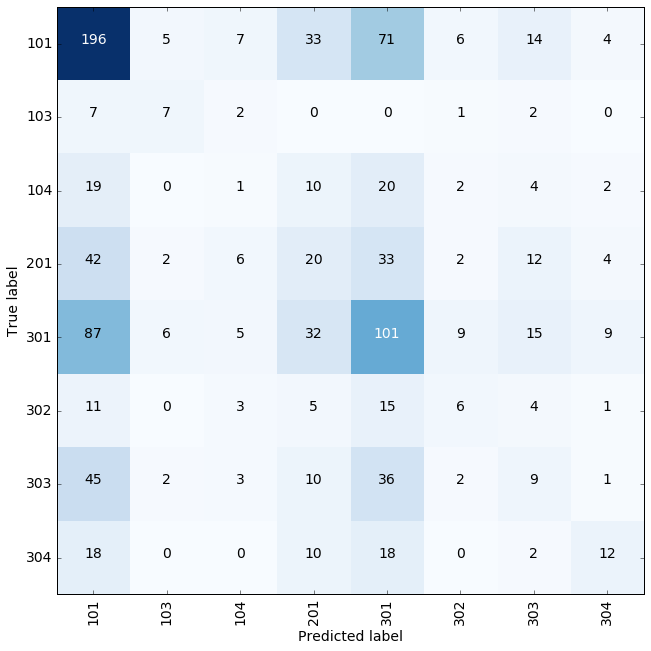

Classification report for classifier LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
             precision    recall  f1-score   support

      101.0    0.49351   0.67857   0.57143       336
      103.0    0.23077   0.31579   0.26667        19
      104.0    0.06250   0.01724   0.02703        58
      201.0    0.35227   0.25620   0.29665       121
      301.0    0.39394   0.54167   0.45614       264
      302.0    0.26316   0.11111   0.15625        45
      303.0    0.42857   0.08333   0.13953       108
      304.0    0.12500   0.03333   0.05263        60

avg / total    0.38188   0.42038   0.37607      1011


Confusion matrix


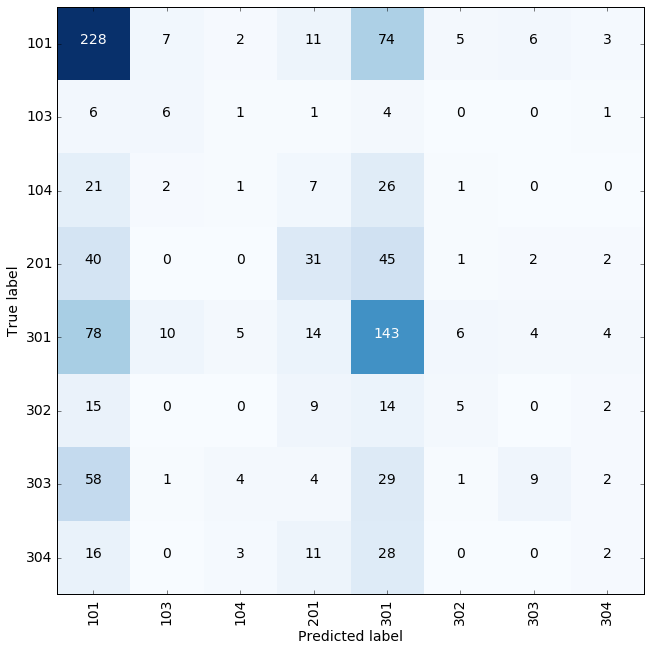

Classification report for classifier SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.51351   0.67857   0.58462       336
      103.0    0.37500   0.31579   0.34286        19
      104.0    0.10000   0.03448   0.05128        58
      201.0    0.24771   0.22314   0.23478       121
      301.0    0.38710   0.54545   0.45283       264
      302.0    0.22222   0.13333   0.16667        45
      303.0    0.31579   0.05556   0.09449       108
      304.0    0.00000   0.00000   0.00000        60

avg / total    0.35780   0.41444   0.36754      1011


Confusion matrix


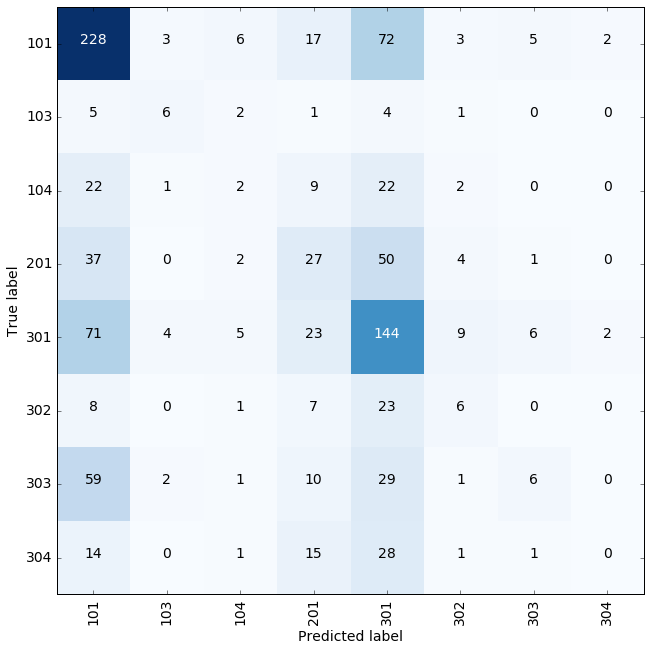

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

      101.0    0.45407   0.77976   0.57393       336
      103.0    0.25000   0.10526   0.14815        19
      104.0    0.18750   0.05172   0.08108        58
      201.0    0.30000   0.22314   0.25592       121
      301.0    0.35379   0.37121   0.36229       264
      302.0    0.60000   0.06667   0.12000        45
      303.0    0.31818   0.06481   0.10769       108
      304.0    0.62500   0.16667   0.26316        60

avg / total    0.39244   0.40752   0.35588      1011


Confusion matrix


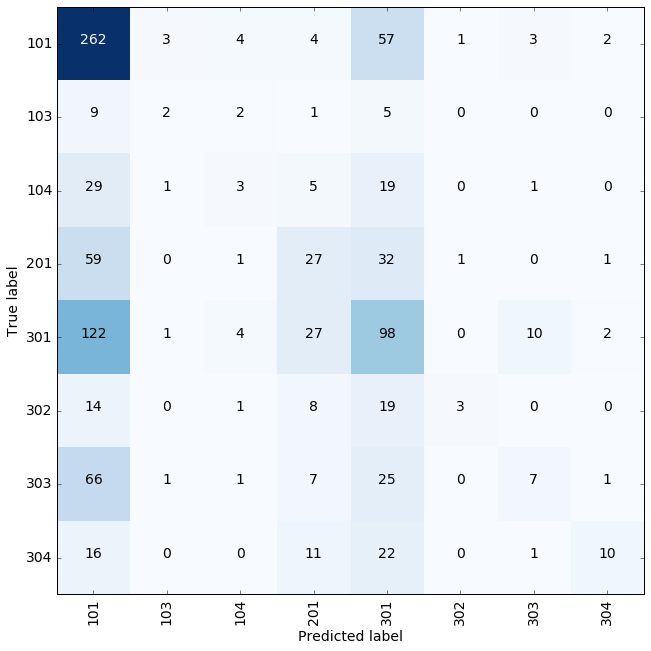

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.50000   0.80655   0.61731       336
      103.0    0.54545   0.31579   0.40000        19
      104.0    0.00000   0.00000   0.00000        58
      201.0    0.45312   0.23967   0.31351       121
      301.0    0.40936   0.53030   0.46205       264
      302.0    0.66667   0.22222   0.33333        45
      303.0    0.50000   0.07407   0.12903       108
      304.0    0.75000   0.25000   0.37500        60

avg / total    0.46515   0.47379   0.42173      1011


Confus

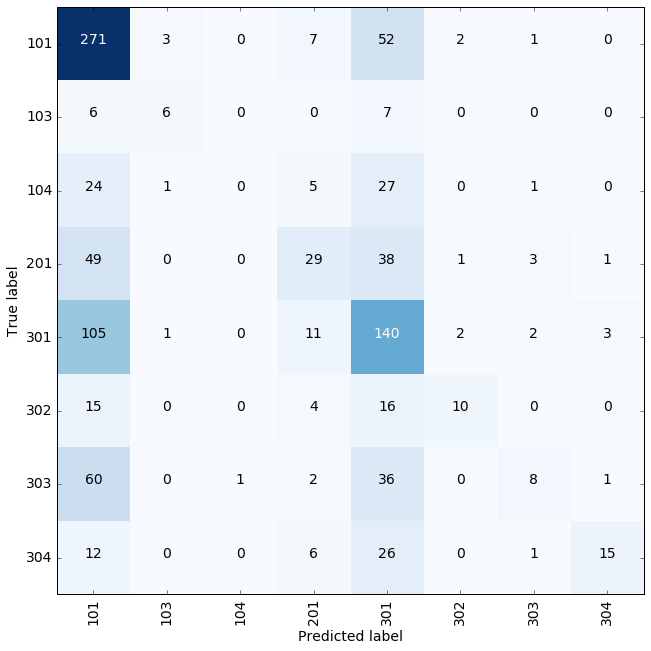

In [83]:
#fitting models to test_data
for model in best_classifiers:
    test_classifier (model, X_train, y_train, X_test, y_test)

In [84]:
dfnew.to_csv('Analysis-NoTimeShift-Activity-Sorted-Wrist.csv')